In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy


In [2]:
!pip install mnist
import mnist


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [4]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [7]:
train_images.shape

(60000, 28, 28, 1)

In [8]:
learning_rate = 0.01
n_epochs = 60
initializer = RandomNormal(mean=0., stddev=1.)

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

/Users/fadi/Documents/Fadi/Koleya/Term 8/Deep Learning/Assignments/Assignment 2/venv/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()],
)

history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=n_epochs,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[early_stopping]
)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 3.4959 - categorical_accuracy: 0.5314 - val_loss: 0.5297 - val_categorical_accuracy: 0.8509
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8946 - categorical_accuracy: 0.7401 - val_loss: 0.3517 - val_categorical_accuracy: 0.8981
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5953 - categorical_accuracy: 0.8129 - val_loss: 0.2812 - val_categorical_accuracy: 0.9185
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4771 - categorical_accuracy: 0.8551 - val_loss: 0.2325 - val_categorical_accuracy: 0.9301
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4043 - categorical_accuracy: 0.8758 - val_loss: 0.2003 - val_categorical_accuracy: 0.9380
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3517 - categorical_accuracy: 0.8921 - val_loss: 0.1721 - val_categorical_acc

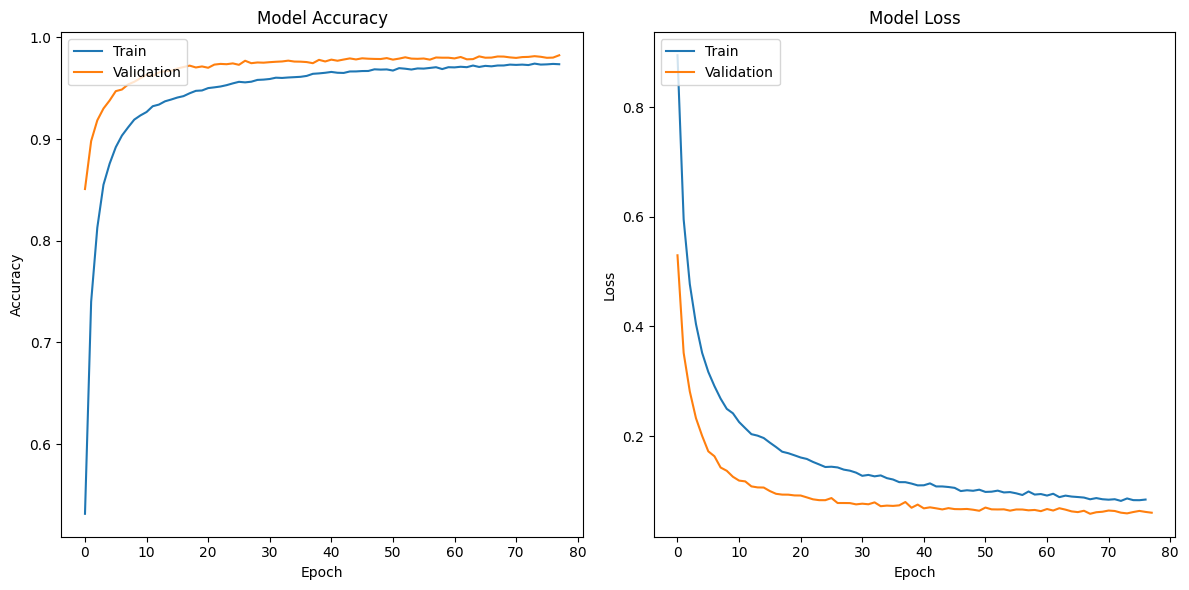

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [12]:
predictions = model.predict(test_images[:5])

print("Predictions:", np.argmax(predictions, axis=1), np.max(np.multiply(predictions, 100), axis=1)) # [7, 2, 1, 0, 4]
print("Actual:     ", test_labels[:5])  # [7, 2, 1, 0, 4]

1/1 [==============================] - 0s 120ms/step
Predictions: [7 2 1 0 4] [99.986244 99.96309  99.99106  99.949036 99.916664]
Actual:      [7 2 1 0 4]


In [13]:
model.save('model.keras')